In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
import mplfinance as mpf
from PIL import Image

In [2]:
df_img_list = pd.read_csv('train_image_level.csv')

In [3]:
df_img_list.head(2)

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed


In [6]:
df_img_list['img_path'] = 'train/' + df_img_list['id'].replace('_image', '', regex=True) + '.jpg'
df_img_list['bin_label'] = df_img_list['boxes'].notna().astype(int)

In [7]:
df_img_list.head(2)

,id,boxes,label,StudyInstanceUID,img_path,bin_label
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,train/000a312787f2.jpg,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,train/000c3a3f293f.jpg,0


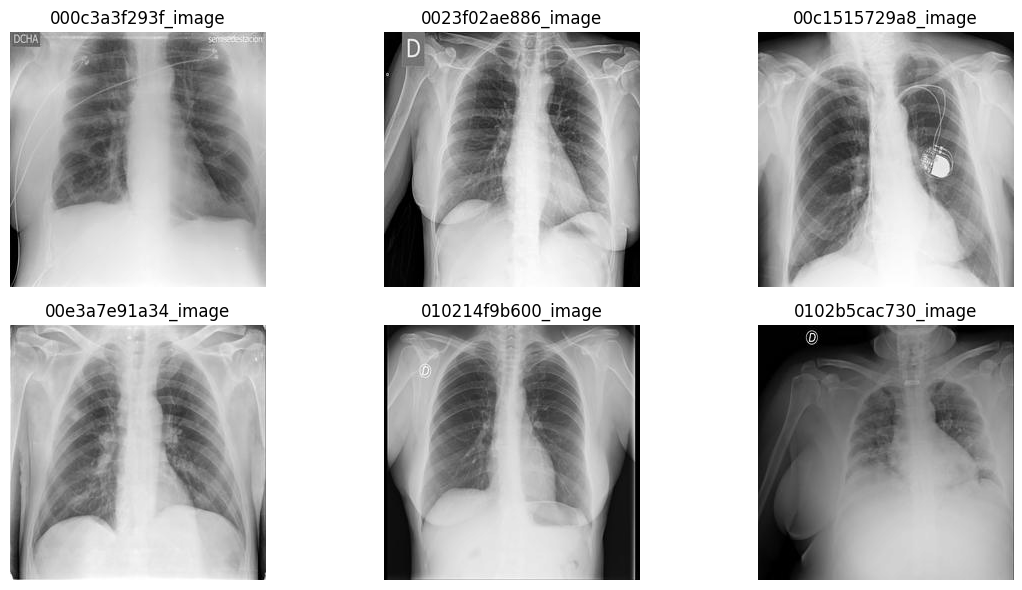

In [34]:
df_temp_list = df_img_list[df_img_list['bin_label'] == 0].head(6)

plt.figure(figsize=(12, 6))

for i, path in enumerate(df_temp_list['img_path']):
    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{df_temp_list['id'].iloc[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

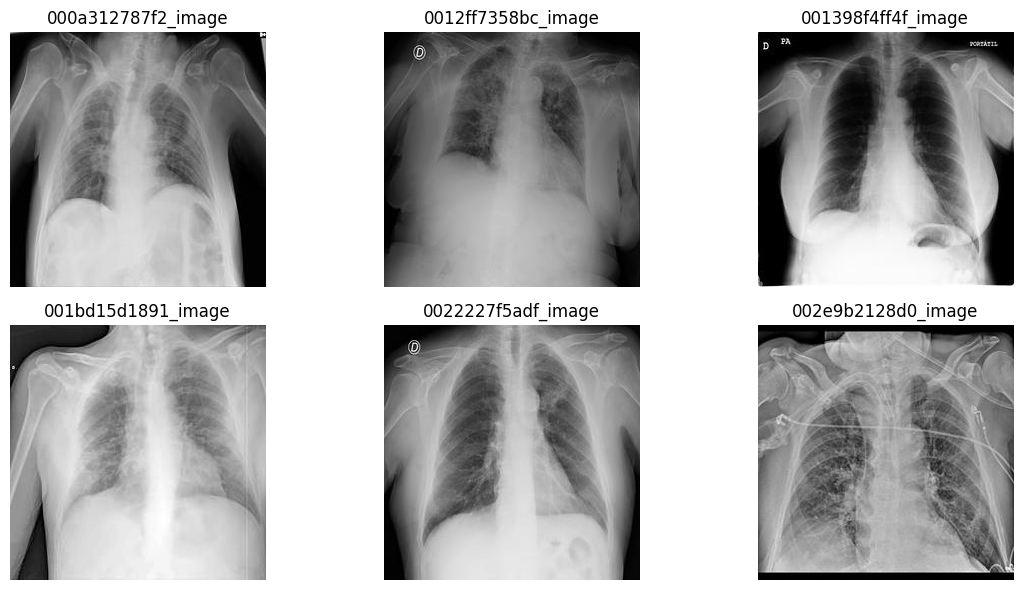

In [36]:
df_temp_list = df_img_list[df_img_list['bin_label'] == 1].head(6)

plt.figure(figsize=(12, 6))

for i, path in enumerate(df_temp_list['img_path']):
    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{df_temp_list['id'].iloc[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()